## Food classifier experiment
1. Import data  
2. Part One  
3. Part two  

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import load_model
import pathlib
import matplotlib.pyplot as plt
import os, sys
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

In [2]:
# Check if GPU is enabled
print("Num GPUs Available: ", len(tf
                                  .config.list_physical_devices('GPU')))

Num GPUs Available:  1


### 1. Import Data

In [3]:
train_dir = 'data/training_set'
training_set = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=101,
image_size=(244, 244),
batch_size=4)

Found 634 files belonging to 3 classes.


In [4]:
test_dir = 'data/test_set'
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=101,
image_size=(244, 244),
batch_size=4)

Found 126 files belonging to 3 classes.


In [5]:
class_names = training_set.class_names
print(class_names)

['Oyaku_Don', 'Salmon', 'Satay']


In [6]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(244,244,
                                                               3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

### 2. Part One
Retain original model parameters and record the time to run 10 epochs.

Model 1

In [19]:
# MODEL ONE
model_one = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=64,kernel_size=(4,4), activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    #Dropout(0.25),
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='tanh'),
    Dropout(0.25),
#     Dense(64, activation='relu'),
#     Dropout(0.25),
    Dense(3, activation='softmax')
    
])

In [20]:
model_one.compile(tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
    #optimizer='RMSprop',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              #metrics=[keras.metrics.CategoricalAccuracy()])
              metrics=['accuracy'])

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

In [22]:
begin = time.time()
history_one = model_one.fit(training_set,
                            validation_data=validation_set, 
                            verbose=True,
                            epochs=150, 
                            )
model_one_time = time.time() - begin  
print('Time taken for model one: {:.1f} seconds'.format(model_one_time))

Epoch 1/150
159/159 [==============================] - 9s 43ms/step - loss: 1.0370 - accuracy: 0.4401 - val_loss: 0.9350 - val_accuracy: 0.4524
Epoch 2/150
159/159 [==============================] - 7s 41ms/step - loss: 0.8005 - accuracy: 0.6341 - val_loss: 0.6736 - val_accuracy: 0.7222
Epoch 3/150
159/159 [==============================] - 7s 42ms/step - loss: 0.6651 - accuracy: 0.7287 - val_loss: 0.4903 - val_accuracy: 0.8095
Epoch 4/150
159/159 [==============================] - 7s 42ms/step - loss: 0.5780 - accuracy: 0.7776 - val_loss: 0.6627 - val_accuracy: 0.7540
Epoch 5/150
159/159 [==============================] - 7s 42ms/step - loss: 0.5185 - accuracy: 0.8013 - val_loss: 0.4860 - val_accuracy: 0.8492
Epoch 6/150
159/159 [==============================] - 7s 43ms/step - loss: 0.4775 - accuracy: 0.8233 - val_loss: 0.5699 - val_accuracy: 0.8095
Epoch 7/150
159/159 [==============================] - 7s 43ms/step - loss: 0.4553 - accuracy: 0.8391 - val_loss: 0.4074 - val_accuracy:

159/159 [==============================] - 6s 38ms/step - loss: 0.2753 - accuracy: 0.9196 - val_loss: 0.5354 - val_accuracy: 0.8730
Epoch 114/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2673 - accuracy: 0.9290 - val_loss: 0.4180 - val_accuracy: 0.9127
Epoch 115/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2381 - accuracy: 0.9338 - val_loss: 0.3554 - val_accuracy: 0.8889
Epoch 116/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2390 - accuracy: 0.9401 - val_loss: 0.3058 - val_accuracy: 0.9286
Epoch 117/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2290 - accuracy: 0.9369 - val_loss: 0.4039 - val_accuracy: 0.9127
Epoch 118/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2477 - accuracy: 0.9338 - val_loss: 0.3332 - val_accuracy: 0.9048
Epoch 119/150
159/159 [==============================] - 6s 38ms/step - loss: 0.2917 - accuracy: 0.9227 - val_loss: 0.2810 - val_accuracy:

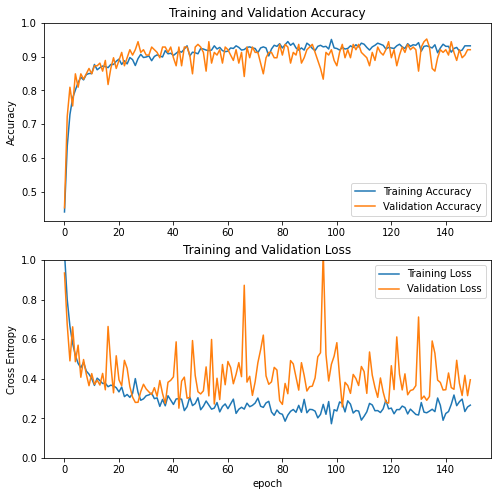

In [23]:
acc = history_one.history['accuracy']
val_acc = history_one.history['val_accuracy']

loss = history_one.history['loss']
val_loss = history_one.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
model_one_loss, model_one_accuracy = model_one.evaluate(validation_set)

print('Accuracy on test dataset for model one:', model_one_accuracy)

32/32 [==============================] - 0s 9ms/step - loss: 0.3948 - accuracy: 0.9206
Accuracy on test dataset for model one: 0.920634925365448


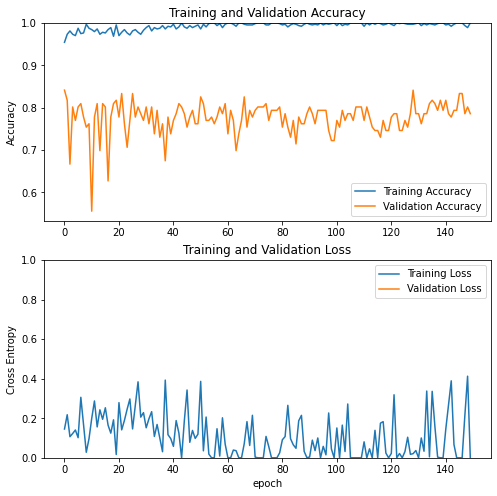

In [13]:
acc = history_one.history['accuracy']
val_acc = history_one.history['val_accuracy']

loss = history_one.history['loss']
val_loss = history_one.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Model 2

In [16]:
# MODEL TWO
model_two = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='tanh'),
    Dropout(0.25),
#     Dense(64, activation='tanh'),
#     Dropout(0.25),
    #Dropout(0.25),
    Dense(3, activation='softmax')
])


model_two.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
    #optimizer='RMSprop',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              #metrics=[keras.metrics.CategoricalAccuracy()])
              metrics=['accuracy'])

In [17]:
begin = time.time()
history_two = model_two.fit(training_set,
                            validation_data=validation_set, 
                            verbose=True,
                            epochs=150,
                            #callbacks = [callback]
                           )
model_two_time = time.time() - begin 
print('Time taken for model two: {:.1f} seconds'.format(model_two_time))

Epoch 1/150
159/159 [==============================] - 18s 96ms/step - loss: 1.1012 - accuracy: 0.3801 - val_loss: 0.9722 - val_accuracy: 0.5873
Epoch 2/150
159/159 [==============================] - 15s 96ms/step - loss: 0.9173 - accuracy: 0.5457 - val_loss: 0.7193 - val_accuracy: 0.6825
Epoch 3/150
159/159 [==============================] - 16s 100ms/step - loss: 0.8161 - accuracy: 0.6451 - val_loss: 0.7369 - val_accuracy: 0.7381
Epoch 4/150
159/159 [==============================] - 16s 101ms/step - loss: 0.6916 - accuracy: 0.7019 - val_loss: 1.5243 - val_accuracy: 0.3968
Epoch 5/150
159/159 [==============================] - 16s 101ms/step - loss: 0.6377 - accuracy: 0.7303 - val_loss: 0.5576 - val_accuracy: 0.7937
Epoch 6/150
159/159 [==============================] - 16s 101ms/step - loss: 0.5778 - accuracy: 0.7886 - val_loss: 0.4315 - val_accuracy: 0.8651
Epoch 7/150
159/159 [==============================] - 16s 101ms/step - loss: 0.4803 - accuracy: 0.8344 - val_loss: 0.5814 - v

159/159 [==============================] - 15s 91ms/step - loss: 0.2572 - accuracy: 0.9274 - val_loss: 0.3015 - val_accuracy: 0.9206
Epoch 113/150
159/159 [==============================] - 14s 91ms/step - loss: 0.3181 - accuracy: 0.9132 - val_loss: 0.3726 - val_accuracy: 0.8968
Epoch 114/150
159/159 [==============================] - 14s 91ms/step - loss: 0.2758 - accuracy: 0.9117 - val_loss: 0.5851 - val_accuracy: 0.8413
Epoch 115/150
159/159 [==============================] - 14s 91ms/step - loss: 0.3117 - accuracy: 0.9101 - val_loss: 0.4638 - val_accuracy: 0.8730
Epoch 116/150
159/159 [==============================] - 15s 91ms/step - loss: 0.3040 - accuracy: 0.9148 - val_loss: 0.2767 - val_accuracy: 0.9365
Epoch 117/150
159/159 [==============================] - 14s 90ms/step - loss: 0.3256 - accuracy: 0.9132 - val_loss: 0.3322 - val_accuracy: 0.9127
Epoch 118/150
159/159 [==============================] - 14s 90ms/step - loss: 0.3082 - accuracy: 0.9132 - val_loss: 0.4492 - val_ac

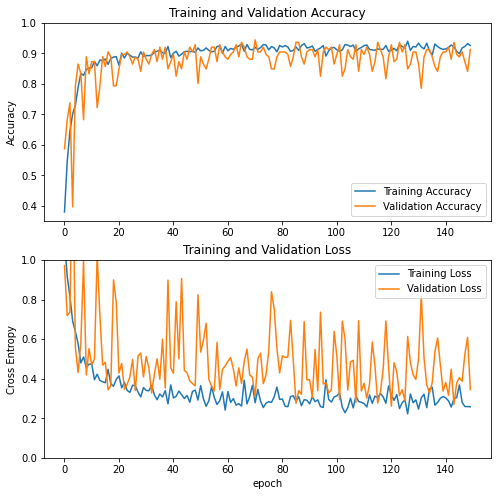

In [25]:
acc = history_two.history['accuracy']
val_acc = history_two.history['val_accuracy']

loss = history_two.history['loss']
val_loss = history_two.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
model_two_loss, model_two_accuracy = model_two.evaluate(validation_set)
print('Accuracy on test dataset for model two:', model_two_accuracy)

32/32 [==============================] - 1s 20ms/step - loss: 0.3451 - accuracy: 0.9127
Accuracy on test dataset for model two: 0.9126983880996704


In [7]:
model_three = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    
#     Dense(512, activation='relu'),
#     Dropout(0.25),
#     Dense(512, activation='relu'),
#     Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='tanh'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

model_three.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              #metrics=[keras.metrics.CategoricalAccuracy()])
              metrics=['accuracy'])

In [8]:
begin = time.time()
history_three = model_three.fit(training_set,
                                validation_data=validation_set, 
                                verbose=True, 
                                epochs=150)
model_three_time = time.time() - begin
print('Time taken for model three: {:.1f} seconds'.format(model_three_time))

Epoch 1/150
159/159 [==============================] - 22s 109ms/step - loss: 1.0977 - accuracy: 0.3770 - val_loss: 0.9228 - val_accuracy: 0.7460
Epoch 2/150
159/159 [==============================] - 16s 102ms/step - loss: 0.8872 - accuracy: 0.5868 - val_loss: 1.2910 - val_accuracy: 0.4127
Epoch 3/150
159/159 [==============================] - 16s 101ms/step - loss: 0.6397 - accuracy: 0.7429 - val_loss: 0.5471 - val_accuracy: 0.7857
Epoch 4/150
159/159 [==============================] - 16s 102ms/step - loss: 0.5803 - accuracy: 0.8123 - val_loss: 0.5891 - val_accuracy: 0.8175
Epoch 5/150
159/159 [==============================] - 16s 102ms/step - loss: 0.5647 - accuracy: 0.7965 - val_loss: 0.3920 - val_accuracy: 0.8571
Epoch 6/150
159/159 [==============================] - 16s 103ms/step - loss: 0.4925 - accuracy: 0.8344 - val_loss: 0.3635 - val_accuracy: 0.8889
Epoch 7/150
159/159 [==============================] - 16s 103ms/step - loss: 0.4634 - accuracy: 0.8344 - val_loss: 0.6735 -

159/159 [==============================] - 16s 101ms/step - loss: 0.4355 - accuracy: 0.8612 - val_loss: 0.4502 - val_accuracy: 0.8730
Epoch 112/150
159/159 [==============================] - 16s 102ms/step - loss: 0.3108 - accuracy: 0.9038 - val_loss: 0.3644 - val_accuracy: 0.9048
Epoch 113/150
159/159 [==============================] - 16s 101ms/step - loss: 0.3602 - accuracy: 0.8927 - val_loss: 0.3284 - val_accuracy: 0.9127
Epoch 114/150
159/159 [==============================] - 16s 101ms/step - loss: 0.4240 - accuracy: 0.8691 - val_loss: 0.3605 - val_accuracy: 0.8968
Epoch 115/150
159/159 [==============================] - 16s 103ms/step - loss: 0.4105 - accuracy: 0.8801 - val_loss: 0.6540 - val_accuracy: 0.8016
Epoch 116/150
159/159 [==============================] - 16s 103ms/step - loss: 0.5780 - accuracy: 0.8155 - val_loss: 0.3771 - val_accuracy: 0.8968
Epoch 117/150
159/159 [==============================] - 16s 101ms/step - loss: 0.4003 - accuracy: 0.8738 - val_loss: 0.5629 -

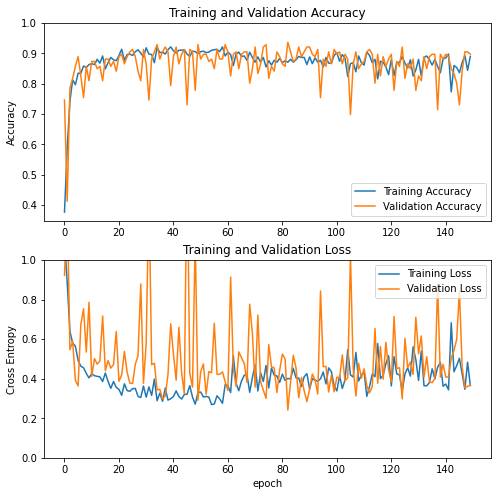

In [9]:
acc = history_three.history['accuracy']
val_acc = history_three.history['val_accuracy']

loss = history_three.history['loss']
val_loss = history_three.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [10]:
model_three_loss, model_three_accuracy = model_three.evaluate(validation_set)
print('Accuracy on test dataset for model three:', model_three_accuracy)

32/32 [==============================] - 1s 19ms/step - loss: 0.3679 - accuracy: 0.8968
Accuracy on test dataset for model three: 0.89682537317276
